In [1]:
# PROBLEM STATEMENT :WE will construct a linear model that explains the relationship
# a car's mileage (mpg) has with its other attributes
#IMport libraries
#step-1:import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Load the file

In [ ]:
#load and REview Data

In [7]:
car=pd.read_csv("auto-mpg.csv")

In [8]:
car.shape

(398, 9)

In [9]:
car.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
90,12.0,8,429.0,198,4952,11.5,73,1,mercury marquis brougham
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet
137,13.0,8,350.0,150,4699,14.5,74,1,buick century luxus (sw)
306,28.8,6,173.0,115,2595,11.3,79,1,chevrolet citation
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
363,22.4,6,231.0,110,3415,15.8,81,1,buick century
195,29.0,4,85.0,52,2035,22.2,76,1,chevrolet chevette
45,18.0,6,258.0,110,2962,13.5,71,1,amc hornet sportabout (sw)
81,28.0,4,97.0,92,2288,17.0,72,3,datsun 510 (sw)
227,19.0,6,225.0,100,3630,17.7,77,1,plymouth volare custom


In [12]:
car.drop("car name",axis=1,inplace=True)

In [14]:
#also replacing the categorical var with actual values

car['origin']=car['origin'].replace({1:'america',2:'europe',3:'asia'})
car.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
138,14.0,8,318.0,150,4457,13.5,74,america
88,14.0,8,302.0,137,4042,14.5,73,america
252,19.2,6,231.0,105,3535,19.2,78,america
381,36.0,4,107.0,75,2205,14.5,82,asia
96,13.0,8,360.0,175,3821,11.0,73,america
278,31.5,4,89.0,71,1990,14.9,78,europe
148,26.0,4,116.0,75,2246,14.0,74,europe
1,15.0,8,350.0,165,3693,11.5,70,america
261,18.1,6,258.0,120,3410,15.1,78,america
79,26.0,4,96.0,69,2189,18.0,72,europe


In [ ]:
# one hot encoding

In [15]:
car=pd.get_dummies(car,columns=["origin"])# one hot encoding

In [16]:
car.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
143,26.0,4,97.0,78,2300,14.5,74,0,0,1
170,23.0,4,140.0,78,2592,18.5,75,1,0,0
43,13.0,8,400.0,170,4746,12.0,71,1,0,0
133,16.0,6,250.0,100,3781,17.0,74,1,0,0
344,39.0,4,86.0,64,1875,16.4,81,1,0,0
57,24.0,4,113.0,95,2278,15.5,72,0,1,0
386,25.0,6,181.0,110,2945,16.4,82,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,1,0,0
127,19.0,6,232.0,100,2901,16.0,74,1,0,0
180,25.0,4,121.0,115,2671,13.5,75,0,0,1


In [17]:
car.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [18]:
car.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [21]:
hpIsDigit=pd.DataFrame(car.hp.str.isdigit())
#if the string is made of digits store True else False
#print IsDigit=False!
car[hpIsDigit["hp"]==False]
#from temp take only those rows where hp has false

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [22]:
car["hp"]=car["hp"].replace("?",np.nan)
car["hp"]=car["hp"].astype(float)

In [23]:
median1=car["hp"].median()
median1

93.5

In [27]:
car["hp"].replace(np.nan,median1,inplace=True)

In [26]:
car[hpIsDigit["hp"]==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [28]:
car.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [24]:
duplicate=car.duplicated()
duplicate.sum()

0

In [ ]:
#There are various ways to handle missing values. Drop the rows, replace missing values with median values etc Nan is the hp column. We could drop those 6rows which might not be good idea under all situations

#BiVariate PLots
#A Bivariate analysis among the diff variables can be done using scatter matrix plot
#seaborn libs create 
# the dimensions. the results can be stored as a png file

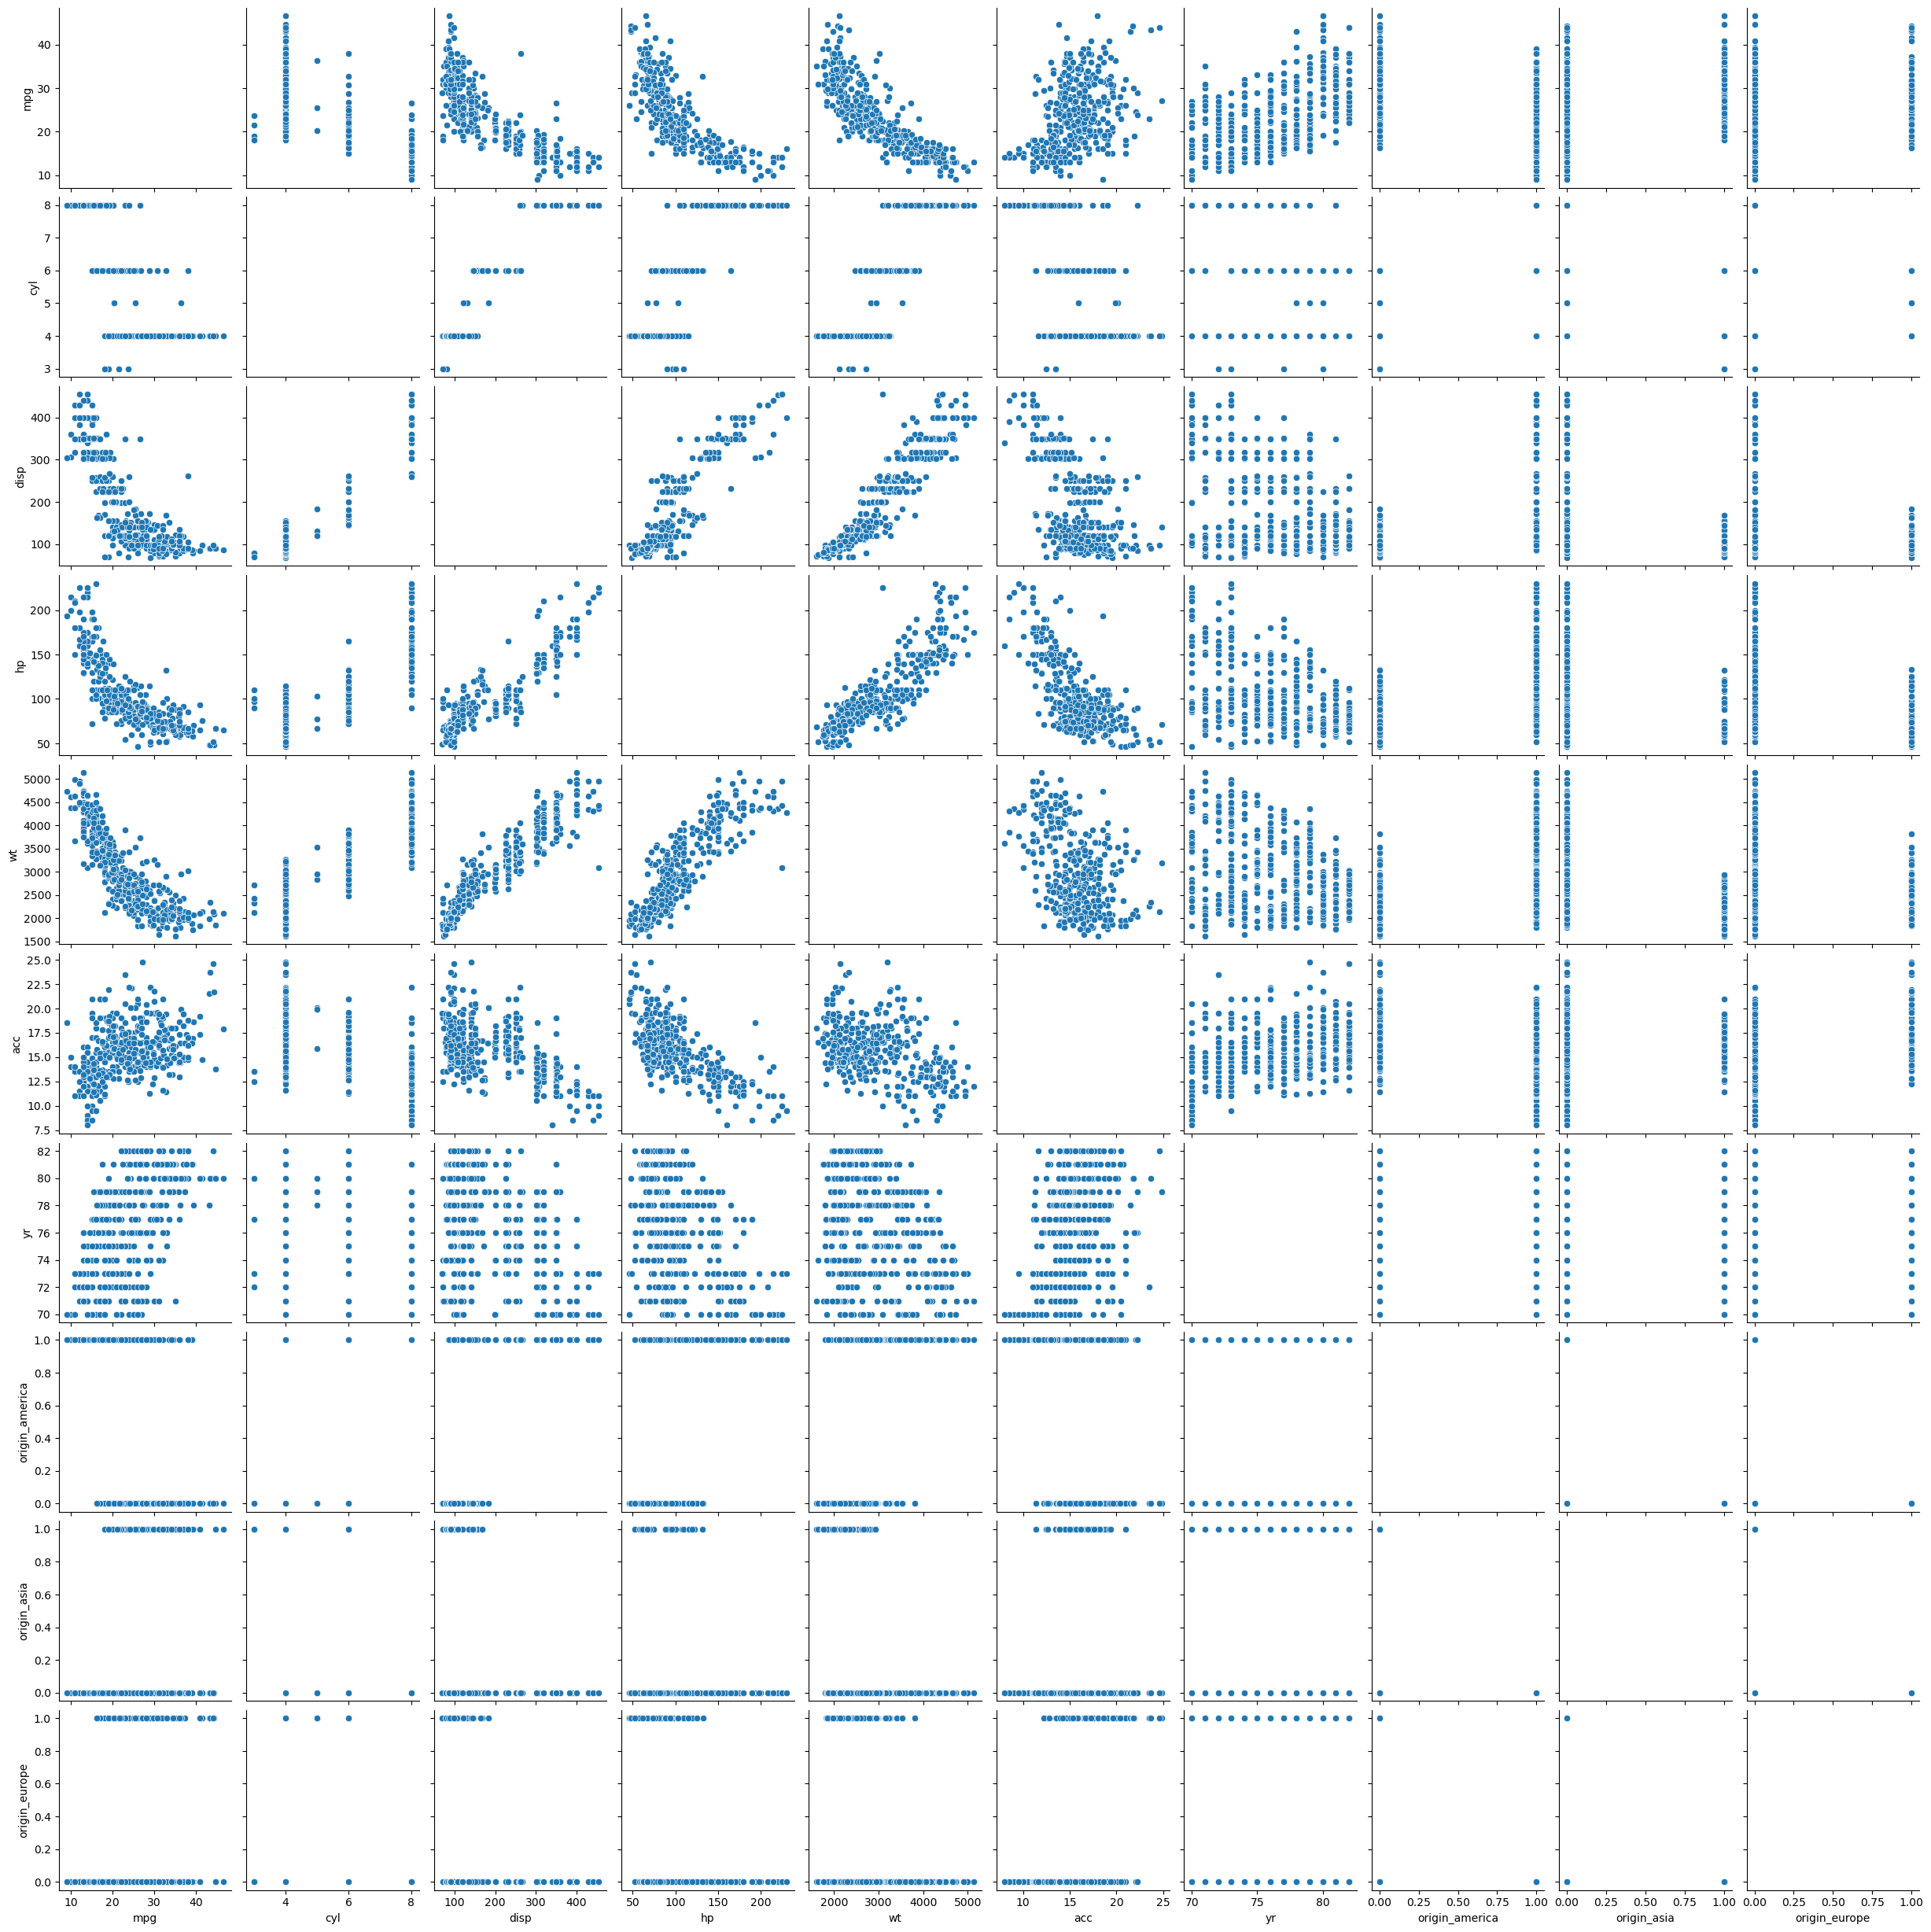

In [29]:
sns.pairplot(car,diag_kind="kda")

In [31]:
# split data
#let us build our linear model
#independent variables
X=car.drop(["mpg"],axis=1)
#the dependent variable
y=car[["mpg"]]

In [34]:
#split x and y into training and testing set in 70:30 ratio
X_train,x_test,y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [35]:
#fit linear model
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
#here are the coefficients of each variables and the intercept
#The score (R^2) for in-sample and out of sample

In [36]:
model1.score(X_train,y_train)

0.8215521225570098

In [37]:
#out of sample score(R^2)
model1.score(x_test,y_test)

0.8226939742691542

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=2,interaction_only=True)
X_train2=poly.fit_transform(X_train)